In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def f(x):
    return np.sum(np.cos(x)**6)

In [36]:
def grad_f(x): 
    return np.sin(x)*(-6)*cos(x)**5

In [20]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    if x0 is None:
        x0 = np.random.random(2)
    history = []
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
    
        curr_x -= lr * grad_f(curr_x)

    return np.vstack(history)

In [9]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

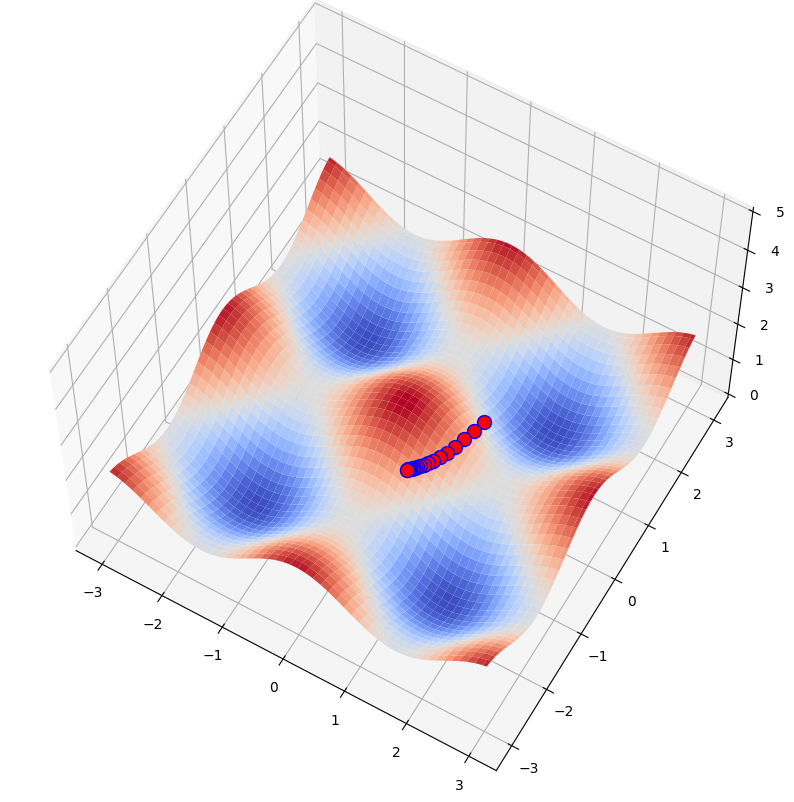

In [34]:
# %matplotlib osx
from matplotlib import cm

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection='3d')

zs = np.array([f(np.array([x,y]))
              for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='o', markersize=10, zorder=3, 
        markerfacecolor='r', lw=3, c='blue')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

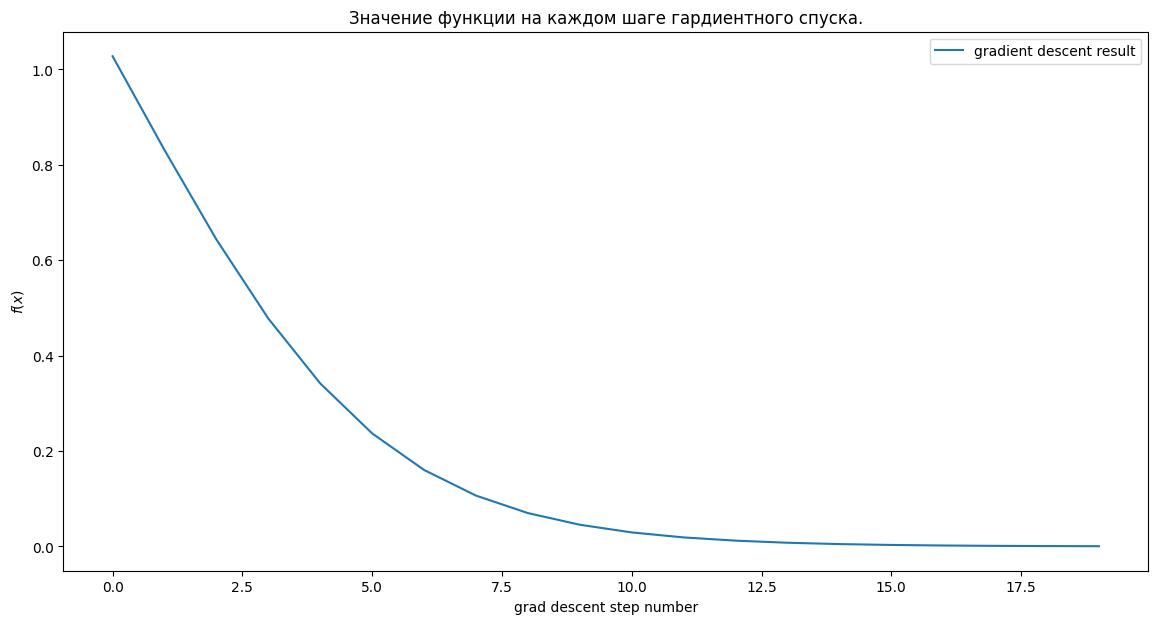

In [12]:
plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()